In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

(360,)


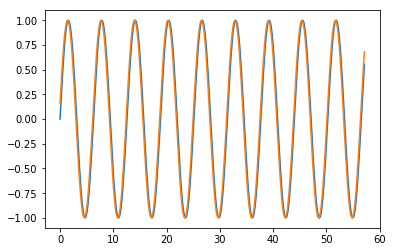

In [2]:
#create a sinusoid sample data

len_angles = 360
angles = np.arange(len_angles)/2/math.pi
_X = np.sin(angles)
plt.plot(angles,_X,label="X")

_y = np.append(_X[1:] , np.sin(360/2/math.pi))
print (_y.shape)
plt.plot(angles,_y, label="y")


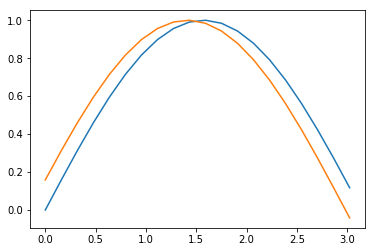

In [3]:
X_split = np.array_split(_X,360/20)
y_split = np.array_split(_y,360/20)
angles_split = np.array_split(angles,360/20)

plt.plot(angles_split[0], X_split[0])
plt.plot(angles_split[0], y_split[0]) # Should be shifted over by 1 index, but just showing that it is indeed 1 step ahead.

In [4]:
"""
Returns X_batch, y_batch

Shape of X_batch: (batch_size, n_steps, n_inputs)
Shape of y_batch: (batch_size, n_steps, n_outputs)
"""
def getDataBatch(batch_size,n_steps,n_inputs,n_outputs):

    X_batch = np.ndarray(shape=(batch_size,n_steps,n_inputs))
    y_batch = np.ndarray(shape=(batch_size,n_steps,n_outputs))
    
    for batch in range(batch_size):
        #So we don't step off the end of the sequence while training
        max_x_start_idx = (len_angles-1) - n_inputs - n_steps

        #Get a random start index
        x_start_idx = np.random.randint(max_x_start_idx)

        x_sequence = np.ndarray(shape=(n_steps,n_inputs),
                             dtype=np.float32)
        y_sequence = np.ndarray(shape=(n_steps,n_outputs),
                             dtype=np.float32)
        for step in range(n_steps):
            #Get X from start idx to start idx + n_inputs
            x_instance = _X[x_start_idx:x_start_idx+20]
            y_instance = np.array([_y[(x_start_idx+20)+1]])
            #x_instance = np.expand_dims(x_instance, axis=0)
            #y_instance = np.expand_dims(y_instance, axis=0)
            
            x_sequence[step] = x_instance
            y_sequence[step] = y_instance
            #np.append(x_sequence, x_instance, axis=0)
            #np.append(y_sequence, y_instance, axis=0)
            
        #x_sequence = np.expand_dims(x_sequence, axis=1)
        #y_sequence = np.expand_dims(y_sequence, axis=1)
        
        X_batch[batch] = x_sequence
        y_batch[batch] = y_sequence
        #np.append(X_batch, x_sequence, axis=0)
        #np.append(y_batch, y_sequence, axis=0)
    
    return X_batch, y_batch

In [5]:
n_neurons = 100
n_layers = 3
n_steps = 20
n_inputs = 20
n_outputs = 1

X = tf.placeholder(dtype=tf.float32,shape=[None,n_steps,n_inputs])
y_ph = tf.placeholder(dtype=tf.float32, shape=[None,n_steps,n_outputs])
layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons,
                                      activation=tf.nn.relu)
             for layer in range(n_layers)]

multi_layer_cell = tf.contrib.rnn.MultiRNNCell(cells = layers)

outputs, states = tf.nn.dynamic_rnn(multi_layer_cell,
                                    X,
                                    dtype=tf.float32)

outputs_reshaped = tf.reshape(tensor=outputs,
                              shape=(-1,n_neurons)) #batch_size * n_neurons
logits = tf.layers.dense(outputs_reshaped, n_outputs)
outputs = tf.reshape(tensor=logits,
                     shape=(-1, n_steps, n_outputs))


In [6]:
loss = tf.reduce_mean(tf.square(outputs - y_ph))

learning_rate = 0.001
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

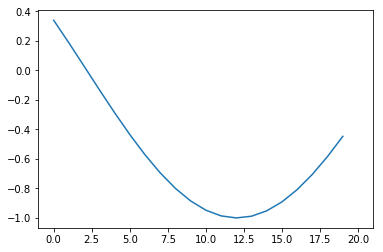

In [7]:
batch_size = 20
X_batch, y_batch = getDataBatch(batch_size,n_steps,n_inputs,n_outputs)
        
plt.plot(np.arange(20),X_batch[0,0,:])
plt.plot(20,y_batch[0,0,:])


In [ ]:
n_iterations = 1000
batch_size = 20

with tf.Session() as sess:
    init.run()
    
    for iteration in range(n_iterations):
        #Get X and y batch
        X_batch, y_batch = getDataBatch(batch_size,n_steps,n_inputs,n_outputs)
       
        sess.run(training_op,feed_dict={X:X_batch, y_ph:y_batch})
        
        if iteration%100 == 0:
            mse = loss.eval(feed_dict={X:X_batch, y_ph:y_batch})
            print("Iteration {0} \tloss:{1}".format(iteration,mse))
        
    X_batch, y_batch = getDataBatch(batch_size,n_steps,n_inputs,n_outputs)
     
    y_pred = sess.run(outputs,feed_dict={X:X_batch})
    
    plt.plot(np.arange(20),X_batch[1

In [ ]:
n_iterations = 1000
batch_size = 20

with tf.Session() as sess:
    init.run()
    
    for iteration in range(n_iterations):
        #Get X and y batch
        X_batch, y_batch = getDataBatch(batch_size,n_steps,n_inputs,n_outputs)
       
        sess.run(training_op,feed_dict={X:X_batch, y_ph:y_batch})
        
        if iteration%100 == 0:
            mse = loss.eval(feed_dict={X:X_batch, y_ph:y_batch})
            print("Iteration {0} \tloss:{1}".format(iteration,mse))
        
    X_batch, y_batch = getDataBatch(batch_size,n_steps,n_inputs,n_outputs)
     
    y_pred = sess.run(outputs,feed_dict={X:X_batch})
    

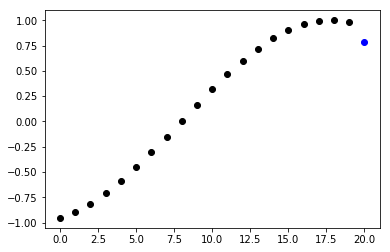

In [21]:
    batch = 5
    step = 10
    plt.plot(np.arange(20),X_batch[batch,step,:], 'ko')
    plt.plot([20],y_pred[batch,step,:], 'bo')